In [1]:
library(ROCR)
library(dplyr)

Warning message:
"package 'ROCR' was built under R version 3.6.3"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.6.3"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
survey <- read.csv('전처리/1번설문/change_bright.csv')

In [3]:
str(survey)
head(survey)

'data.frame':	117 obs. of  13 variables:
 $ X          : int  0 1 2 3 4 5 6 7 8 9 ...
 $ sex        : Factor w/ 2 levels "Female","Male": 2 1 1 1 1 1 1 2 1 1 ...
 $ age_class  : int  20 20 20 20 20 20 20 20 20 20 ...
 $ definition : Factor w/ 2 levels "bright","harmony": 2 1 1 2 1 2 2 2 2 1 ...
 $ need       : Factor w/ 2 levels "bright","harmony": 2 2 1 2 1 2 2 2 2 1 ...
 $ purpose    : Factor w/ 3 levels "clothes","cosmetic",..: 1 1 1 1 3 3 3 1 1 1 ...
 $ interest   : int  5 5 3 3 4 2 5 3 4 4 ...
 $ comp       : int  4 1 2 5 4 3 1 1 1 5 ...
 $ triangle1  : int  5 1 4 5 2 4 4 1 4 5 ...
 $ triangle2  : int  2 2 1 4 1 1 5 3 1 2 ...
 $ doubleness1: int  3 2 2 5 1 2 3 1 1 2 ...
 $ doubleness2: int  2 3 1 4 2 2 3 5 2 1 ...
 $ doubleness3: int  2 2 2 1 2 2 3 5 2 5 ...


X,sex,age_class,definition,need,purpose,interest,comp,triangle1,triangle2,doubleness1,doubleness2,doubleness3
0,Male,20,harmony,harmony,clothes,5,4,5,2,3,2,2
1,Female,20,bright,harmony,clothes,5,1,1,2,2,3,2
2,Female,20,bright,bright,clothes,3,2,4,1,2,1,2
3,Female,20,harmony,harmony,clothes,3,5,5,4,5,4,1
4,Female,20,bright,bright,etc,4,4,2,1,1,2,2
5,Female,20,harmony,harmony,etc,2,3,4,1,2,2,2


In [4]:
survey = filter(survey, sex=='Female')

In [5]:
str(survey)

'data.frame':	90 obs. of  13 variables:
 $ X          : int  1 2 3 4 5 6 8 9 10 12 ...
 $ sex        : Factor w/ 2 levels "Female","Male": 1 1 1 1 1 1 1 1 1 1 ...
 $ age_class  : int  20 20 20 20 20 20 20 20 20 20 ...
 $ definition : Factor w/ 2 levels "bright","harmony": 1 1 2 1 2 2 2 1 2 2 ...
 $ need       : Factor w/ 2 levels "bright","harmony": 2 1 2 1 2 2 2 1 2 2 ...
 $ purpose    : Factor w/ 3 levels "clothes","cosmetic",..: 1 1 1 3 3 3 1 1 3 3 ...
 $ interest   : int  5 3 3 4 2 5 4 4 3 3 ...
 $ comp       : int  1 2 5 4 3 1 1 5 5 1 ...
 $ triangle1  : int  1 4 5 2 4 4 4 5 3 4 ...
 $ triangle2  : int  2 1 4 1 1 5 1 2 2 3 ...
 $ doubleness1: int  2 2 5 1 2 3 1 2 3 3 ...
 $ doubleness2: int  3 1 4 2 2 3 2 1 5 1 ...
 $ doubleness3: int  2 2 1 2 2 3 2 5 2 2 ...


In [6]:
survey$comp1 <- case_when(
    survey$comp == 1 ~ 1,
    survey$comp != 1 ~ 0)

survey$comp2 <- case_when(
    survey$comp == 2 ~ 1,
    survey$comp != 2 ~ 0)

survey$comp3 <- case_when(
    survey$comp == 3 ~ 1,
    survey$comp != 3 ~ 0)

survey$comp4 <- case_when(
    survey$comp == 4 ~ 1,
    survey$comp != 4 ~ 0)

survey$comp5 <- case_when(
    survey$comp == 5 ~ 1,
    survey$comp != 5 ~ 0)

survey$t1_1 <- case_when(
    survey$triangle1 == 1 ~ 1,
    survey$triangle1 != 1 ~ 0)

survey$t1_2 <- case_when(
    survey$triangle1 == 2 ~ 1,
    survey$triangle1 != 2 ~ 0)

survey$t1_3 <- case_when(
    survey$triangle1 == 3 ~ 1,
    survey$triangle1 != 3 ~ 0)

survey$t1_4 <- case_when(
    survey$triangle1 == 4 ~ 1,
    survey$triangle1 != 4 ~ 0)

survey$t1_5 <- case_when(
    survey$triangle1 == 5 ~ 1,
    survey$triangle1 != 5 ~ 0)
	
survey$t2_1 <- case_when(
    survey$triangle2 == 1 ~ 1,
    survey$triangle2 != 1 ~ 0)

survey$t2_2 <- case_when(
    survey$triangle2 == 2 ~ 1,
    survey$triangle2 != 2 ~ 0)

survey$t2_3 <- case_when(
    survey$triangle2 == 3 ~ 1,
    survey$triangle2 != 3 ~ 0)

survey$t2_4 <- case_when(
    survey$triangle2 == 4 ~ 1,
    survey$triangle2 != 4 ~ 0)

survey$t2_5 <- case_when(
    survey$triangle2 == 5 ~ 1,
    survey$triangle2 != 5 ~ 0)
	
survey$d1_1 <- case_when(
    survey$doubleness1 == 1 ~ 1,
    survey$doubleness1 != 1 ~ 0)

survey$d1_2 <- case_when(
    survey$doubleness1 == 2 ~ 1,
    survey$doubleness1 != 2 ~ 0)

survey$d1_3 <- case_when(
    survey$doubleness1 == 3 ~ 1,
    survey$doubleness1 != 3 ~ 0)

survey$d1_4 <- case_when(
    survey$doubleness1 == 4 ~ 1,
    survey$doubleness1 != 4 ~ 0)

survey$d1_5 <- case_when(
    survey$doubleness1 == 5 ~ 1,
    survey$doubleness1 != 5 ~ 0)
	
survey$d2_1 <- case_when(
    survey$doubleness2 == 1 ~ 1,
    survey$doubleness2 != 1 ~ 0)

survey$d2_2 <- case_when(
    survey$doubleness2 == 2 ~ 1,
    survey$doubleness2 != 2 ~ 0)

survey$d2_3 <- case_when(
    survey$doubleness2 == 3 ~ 1,
    survey$doubleness2 != 3 ~ 0)

survey$d2_4 <- case_when(
    survey$doubleness2 == 4 ~ 1,
    survey$doubleness2 != 4 ~ 0)

survey$d2_5 <- case_when(
    survey$doubleness2 == 5 ~ 1,
    survey$doubleness2 != 5 ~ 0)
	
survey$d3_1 <- case_when(
    survey$doubleness3 == 1 ~ 1,
    survey$doubleness3 != 1 ~ 0)

survey$d3_2 <- case_when(
    survey$doubleness3 == 2 ~ 1,
    survey$doubleness3 != 2 ~ 0)

survey$d3_3 <- case_when(
    survey$doubleness3 == 3 ~ 1,
    survey$doubleness3 != 3 ~ 0)

survey$d3_4 <- case_when(
    survey$doubleness3 == 4 ~ 1,
    survey$doubleness3 != 4 ~ 0)

survey$d3_5 <- case_when(
    survey$doubleness3 == 5 ~ 1,
    survey$doubleness3 != 5 ~ 0)

In [7]:
head(survey)

X,sex,age_class,definition,need,purpose,interest,comp,triangle1,triangle2,...,d2_1,d2_2,d2_3,d2_4,d2_5,d3_1,d3_2,d3_3,d3_4,d3_5
1,Female,20,bright,harmony,clothes,5,1,1,2,...,0,0,1,0,0,0,1,0,0,0
2,Female,20,bright,bright,clothes,3,2,4,1,...,1,0,0,0,0,0,1,0,0,0
3,Female,20,harmony,harmony,clothes,3,5,5,4,...,0,0,0,1,0,1,0,0,0,0
4,Female,20,bright,bright,etc,4,4,2,1,...,0,1,0,0,0,0,1,0,0,0
5,Female,20,harmony,harmony,etc,2,3,4,1,...,0,1,0,0,0,0,1,0,0,0
6,Female,20,harmony,harmony,etc,5,1,4,5,...,0,0,1,0,0,0,0,1,0,0


In [8]:
train <- survey[1:63, ]
test <- survey[64:90, ]

In [9]:
model <- glm(comp1 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


Call:
glm(formula = comp1 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4409  -0.9950  -0.6398   0.9427   2.1600  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)        -4.5903     1.6000  -2.869  0.00412 **
definitionharmony   0.7487     0.7598   0.985  0.32441   
needharmony         0.8834     0.6835   1.293  0.19615   
purposecosmetic    -0.2012     0.7727  -0.260  0.79460   
purposeetc          0.1449     0.6783   0.214  0.83078   
interest            0.8535     0.3517   2.427  0.01523 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 84.635  on 62  degrees of freedom
Residual deviance: 73.421  on 57  degrees of freedom
AIC: 85.421

Number of Fisher Scoring iterations: 4


In [10]:
anova(model, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,84.63464,NA
definition,1,2.2343606,61,82.40028,0.134972446
need,1,1.8066598,60,80.59362,0.178909434
purpose,2,0.1810582,58,80.41256,0.913447769
interest,1,6.9920085,57,73.42055,0.008187443


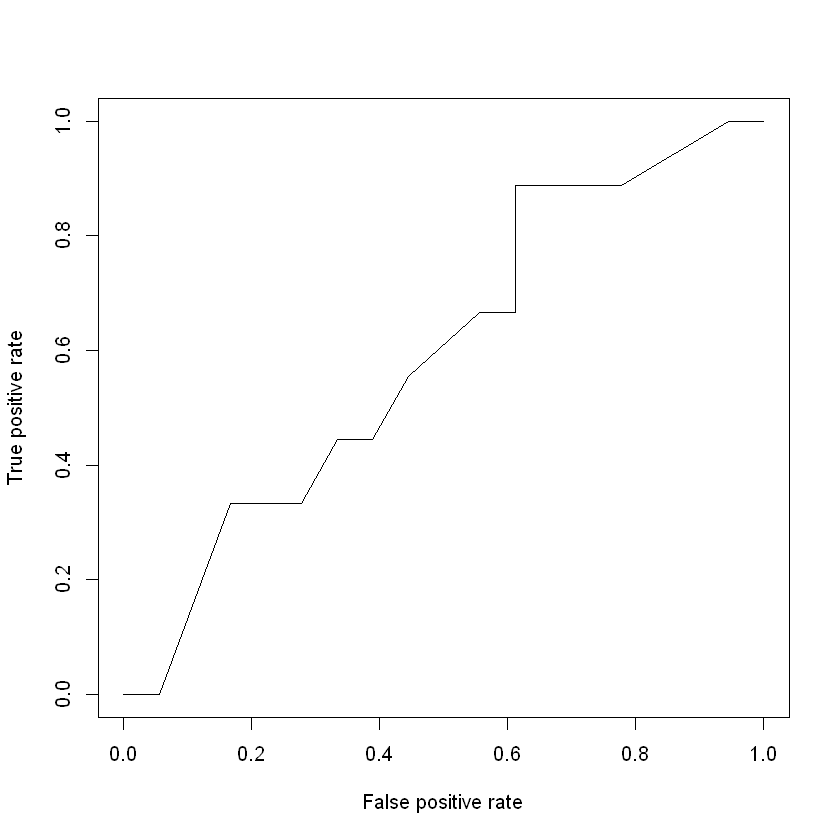

In [11]:
p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

In [12]:
auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

[1] 0.595679


Call:
glm(formula = comp2 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8607  -0.6807  -0.5262  -0.4108   2.2412  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)       -0.943790   1.554856  -0.607    0.544
definitionharmony -0.543811   0.861457  -0.631    0.528
needharmony       -0.558060   0.839607  -0.665    0.506
purposecosmetic    0.131858   0.915201   0.144    0.885
purposeetc        -0.394029   0.865213  -0.455    0.649
interest           0.003232   0.371475   0.009    0.993

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 55.132  on 62  degrees of freedom
Residual deviance: 53.090  on 57  degrees of freedom
AIC: 65.09

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,55.13233,NA
definition,1,1.144929e+00,61,53.98740,0.2846132
need,1,4.896579e-01,60,53.49774,0.4840800
purpose,2,4.071784e-01,58,53.09057,0.8157974
interest,1,7.568599e-05,57,53.09049,0.9930587


[1] 0.5409091

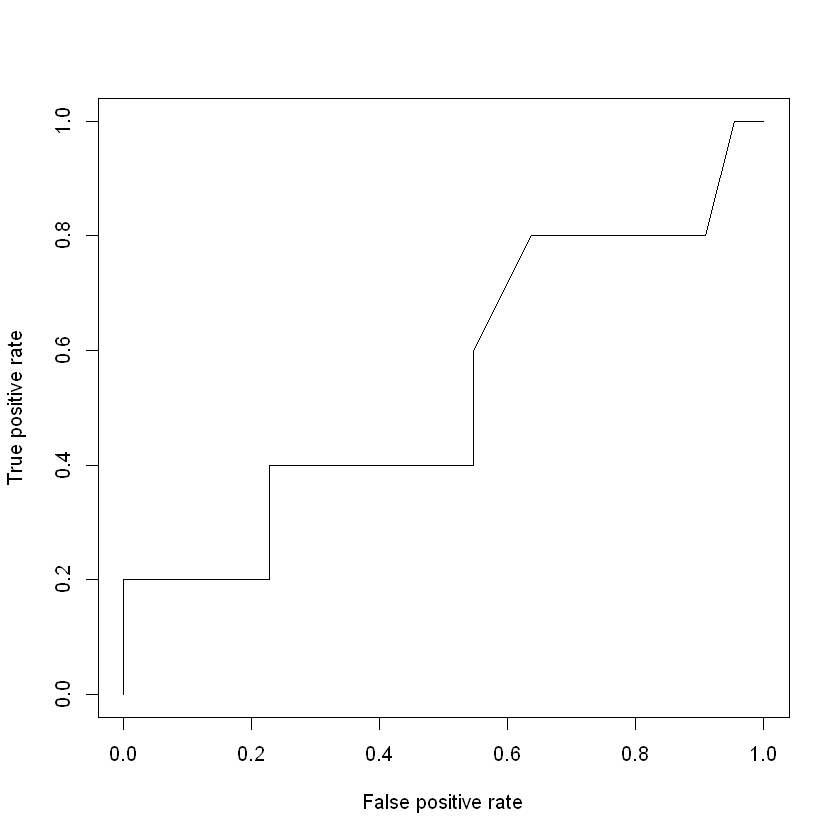

In [13]:
model <- glm(comp2 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = comp3 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2659  -0.5967  -0.4175  -0.2843   2.3825  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)         0.3308     1.6141   0.205    0.838  
definitionharmony  -0.4715     1.0911  -0.432    0.666  
needharmony         1.0172     1.0829   0.939    0.348  
purposecosmetic     0.7122     1.0369   0.687    0.492  
purposeetc          0.6221     0.9349   0.665    0.506  
interest           -0.8373     0.3993  -2.097    0.036 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 55.132  on 62  degrees of freedom
Residual deviance: 48.846  on 57  degrees of freedom
AIC: 60.846

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,55.13233,NA
definition,1,0.1291661,61,55.00316,0.71929821
need,1,0.7414861,60,54.26168,0.38918524
purpose,2,0.5398165,58,53.72186,0.76344953
interest,1,4.8762958,57,48.84557,0.02722799


[1] 0.5833333

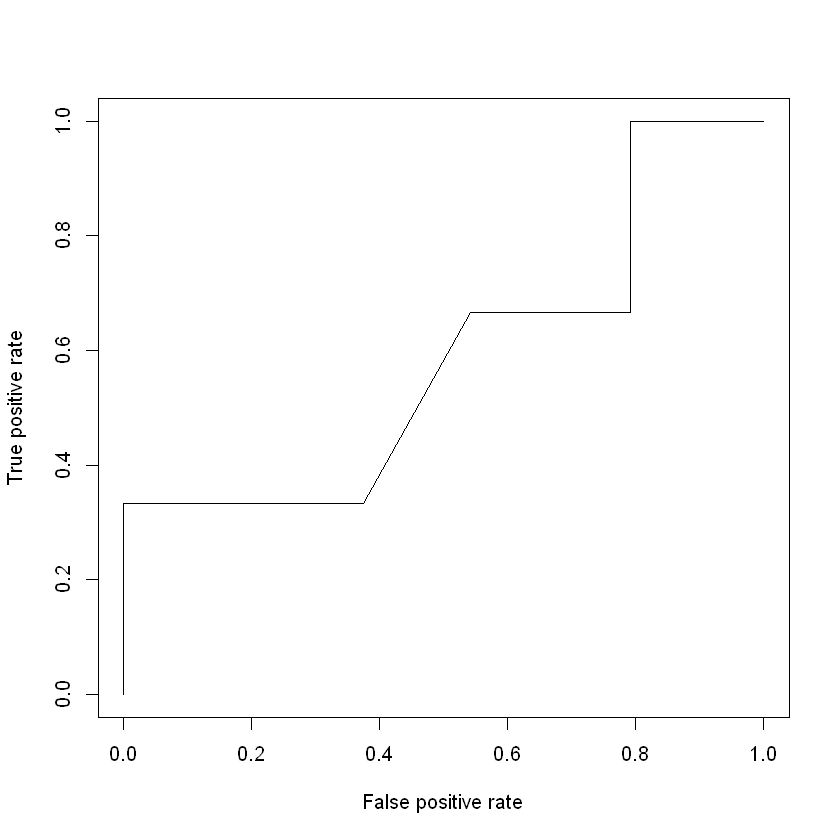

In [14]:
model <- glm(comp3 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = comp4 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.36680  -0.55632  -0.00006  -0.00003   1.83041  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)         -0.8018     2.2867  -0.351    0.726
definitionharmony    1.5830     1.2888   1.228    0.219
needharmony        -20.3167  2835.2370  -0.007    0.994
purposecosmetic     -0.9786     1.4163  -0.691    0.490
purposeetc           0.6129     1.3710   0.447    0.655
interest            -0.3197     0.5586  -0.572    0.567

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 39.626  on 62  degrees of freedom
Residual deviance: 26.269  on 57  degrees of freedom
AIC: 38.269

Number of Fisher Scoring iterations: 19


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,39.62602,NA
definition,1,0.6358168,61,38.99020,0.4252296826
need,1,11.3127420,60,27.67746,0.0007697701
purpose,2,1.0824291,58,26.59503,0.5820409002
interest,1,0.3263538,57,26.26868,0.5678140249


[1] 0.326087

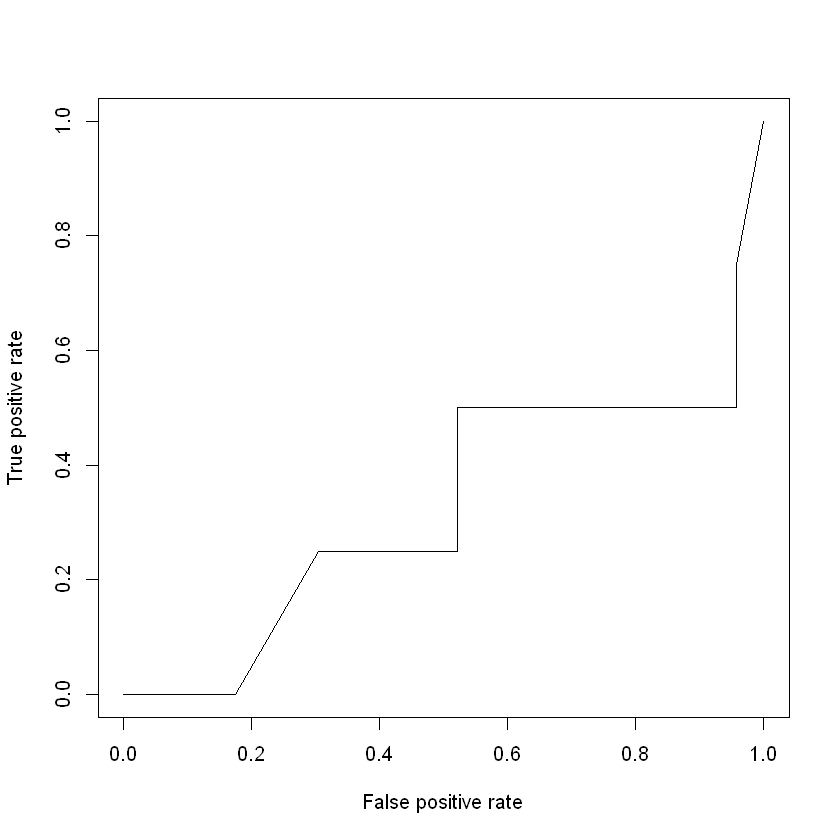

In [15]:
model <- glm(comp4 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = comp5 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9561  -0.6980  -0.5950  -0.4851   2.0964  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -0.1078     1.4328  -0.075    0.940
definitionharmony  -0.7404     0.8498  -0.871    0.384
needharmony         0.4527     0.8313   0.545    0.586
purposecosmetic    -0.1734     0.8690  -0.199    0.842
purposeetc         -0.3634     0.7648  -0.475    0.635
interest           -0.2645     0.3448  -0.767    0.443

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 61.351  on 62  degrees of freedom
Residual deviance: 59.953  on 57  degrees of freedom
AIC: 71.953

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,61.35100,NA
definition,1,0.2911146,61,61.05989,0.5895072
need,1,0.2551503,60,60.80474,0.6134717
purpose,2,0.2621421,58,60.54259,0.8771554
interest,1,0.5897674,57,59.95283,0.4425091


[1] 0.3333333

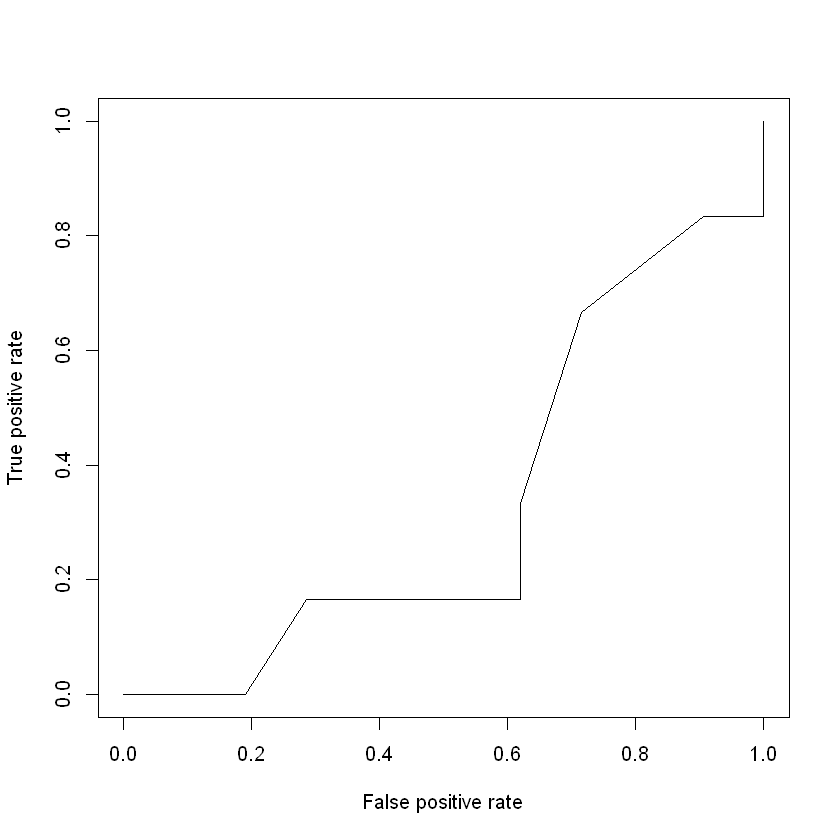

In [16]:
model <- glm(comp5 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$comp5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_1 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9737  -0.6163  -0.4421  -0.3265   2.4106  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -4.4555     2.0171  -2.209   0.0272 *
definitionharmony   0.6394     1.0629   0.602   0.5475  
needharmony         0.2083     0.9426   0.221   0.8251  
purposecosmetic     1.7098     1.1888   1.438   0.1504  
purposeetc          1.0609     1.1774   0.901   0.3676  
interest            0.2796     0.4135   0.676   0.4989  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 51.675  on 62  degrees of freedom
Residual deviance: 47.708  on 57  degrees of freedom
AIC: 59.708

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,51.67466,NA
definition,1,0.79301611,61,50.88164,0.3731897
need,1,0.02384651,60,50.85779,0.8772761
purpose,2,2.67449936,58,48.18329,0.2625668
interest,1,0.47479433,57,47.70850,0.4907898


[1] 0.5045455

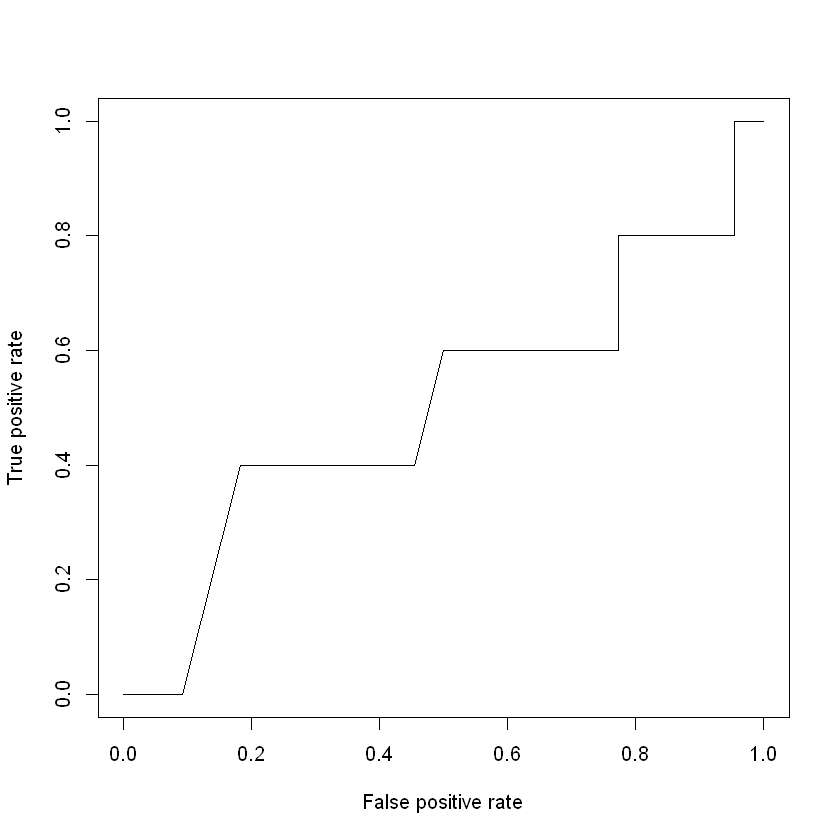

In [17]:
model <- glm(t1_1 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_2 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2047  -0.4557  -0.2235  -0.1386   2.7213  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)         1.4569     2.0305   0.718    0.473  
definitionharmony  -3.1625     1.4007  -2.258    0.024 *
needharmony         0.8859     1.2558   0.705    0.481  
purposecosmetic     0.8650     1.4544   0.595    0.552  
purposeetc          1.4650     1.2132   1.208    0.227  
interest           -0.9527     0.4840  -1.968    0.049 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 51.675  on 62  degrees of freedom
Residual deviance: 37.198  on 57  degrees of freedom
AIC: 49.198

Number of Fisher Scoring iterations: 6


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,51.67466,NA
definition,1,8.17052393,61,43.50413,0.004257661
need,1,0.02670656,60,43.47743,0.870186649
purpose,2,1.52160926,58,41.95582,0.467290281
interest,1,4.75801485,57,37.19780,0.029162164


[1] 0.4727273

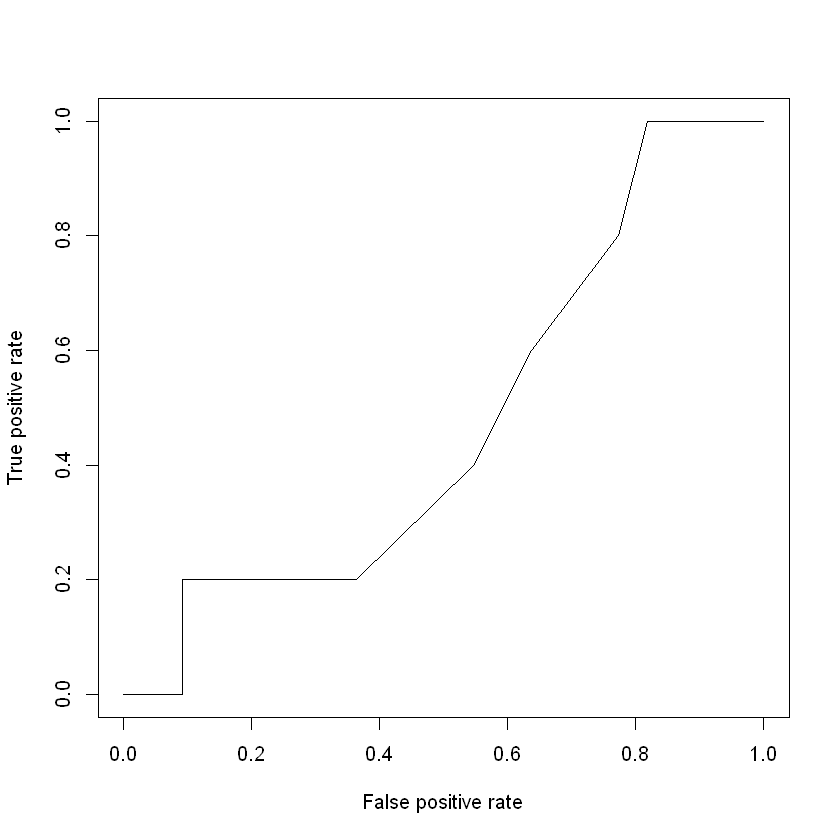

In [18]:
model <- glm(t1_2 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_3 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1272  -0.6859  -0.5399  -0.4076   2.2492  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)        0.007123   1.483567   0.005    0.996
definitionharmony -0.316440   0.853371  -0.371    0.711
needharmony       -0.015151   0.806438  -0.019    0.985
purposecosmetic    0.170926   0.818878   0.209    0.835
purposeetc        -0.933059   0.848082  -1.100    0.271
interest          -0.297235   0.362676  -0.820    0.412

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 58.352  on 62  degrees of freedom
Residual deviance: 55.517  on 57  degrees of freedom
AIC: 67.517

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,58.35193,NA
definition,1,0.01215131,61,58.33978,0.9122246
need,1,0.02443075,60,58.31535,0.8757939
purpose,2,2.12028325,58,56.19507,0.3464067
interest,1,0.67852953,57,55.51654,0.4100935


[1] 0.1

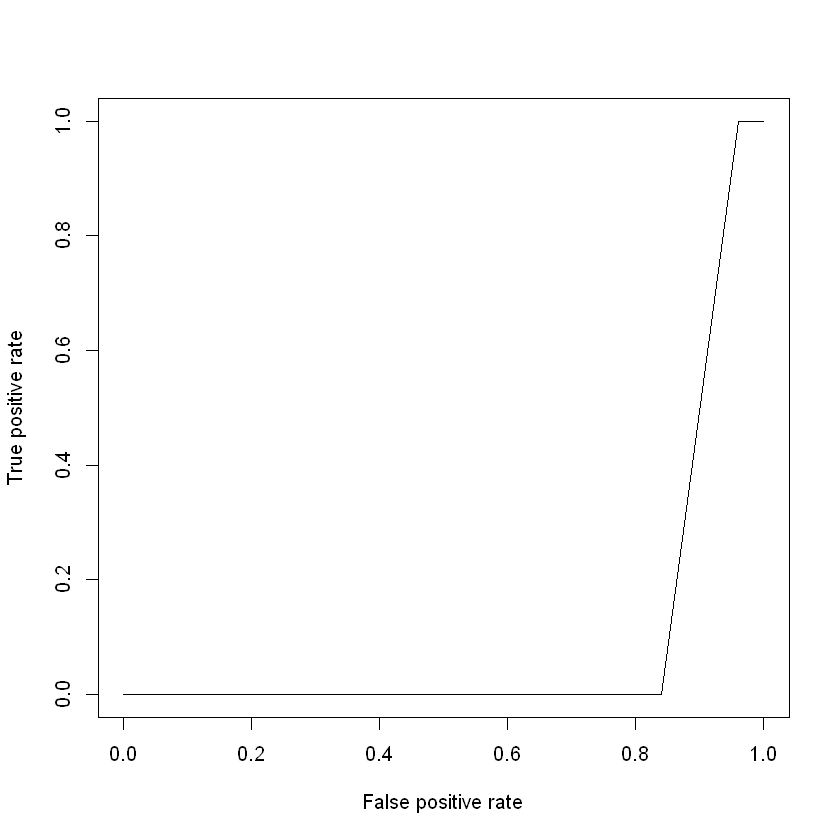

In [19]:
model <- glm(t1_3 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_4 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3826  -0.9953  -0.7730   1.2140   1.7687  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -2.64059    1.37299  -1.923   0.0544 .
definitionharmony  0.69928    0.72937   0.959   0.3377  
needharmony        0.21593    0.66288   0.326   0.7446  
purposecosmetic   -0.42508    0.74887  -0.568   0.5703  
purposeetc         0.01048    0.64291   0.016   0.9870  
interest           0.43709    0.31102   1.405   0.1599  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 82.692  on 62  degrees of freedom
Residual deviance: 78.759  on 57  degrees of freedom
AIC: 90.759

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,82.69189,NA
definition,1,1.2728981,61,81.41899,0.2592237
need,1,0.1745126,60,81.24447,0.6761321
purpose,2,0.3851908,58,80.85928,0.8248156
interest,1,2.1000654,57,78.75922,0.1472928


[1] 0.5611111

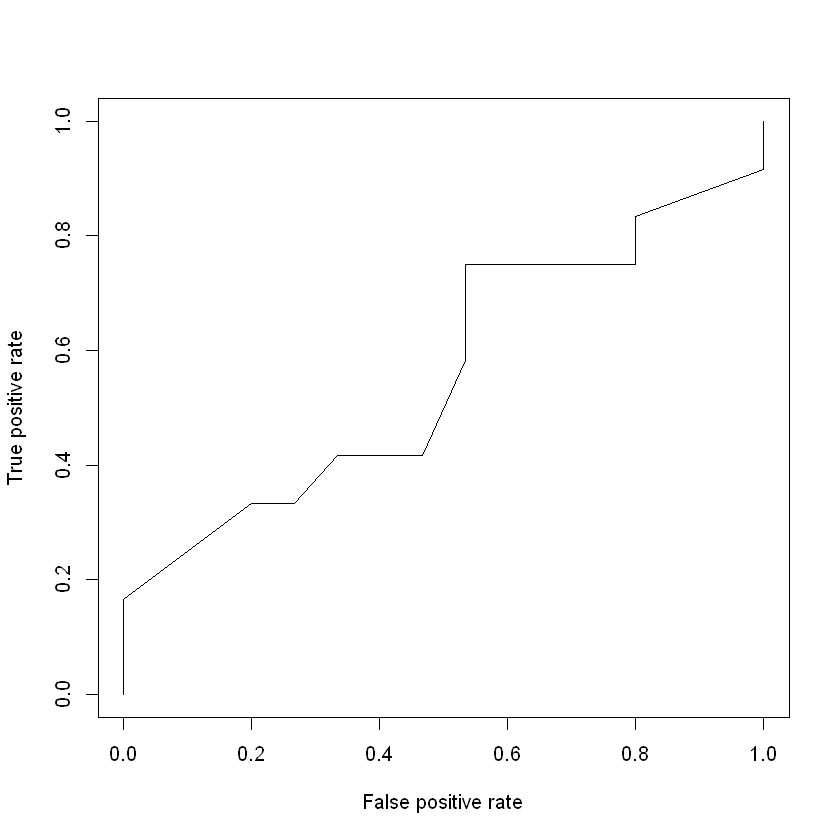

In [20]:
model <- glm(t1_4 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t1_5 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0642  -0.6581  -0.5455  -0.3233   2.1758  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -1.7427     1.6523  -1.055    0.292
definitionharmony   0.9296     0.9471   0.981    0.326
needharmony        -0.6547     0.8476  -0.772    0.440
purposecosmetic    -1.8612     1.1790  -1.579    0.114
purposeetc         -0.4927     0.7513  -0.656    0.512
interest            0.1352     0.3867   0.350    0.727

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 58.352  on 62  degrees of freedom
Residual deviance: 54.273  on 57  degrees of freedom
AIC: 66.273

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,58.35193,NA
definition,1,0.3540740,61,57.99786,0.5518159
need,1,0.4104542,60,57.58740,0.5217390
purpose,2,3.1911935,58,54.39621,0.2027875
interest,1,0.1231934,57,54.27302,0.7255964


[1] 0.4791667

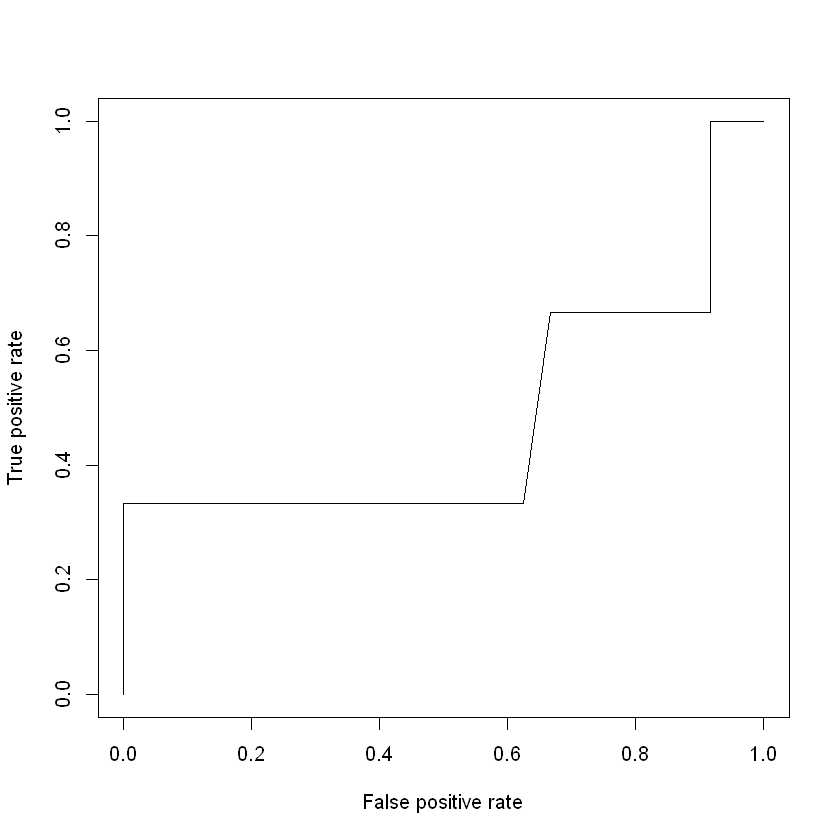

In [21]:
model <- glm(t1_5 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t1_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_1 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1845  -0.7837  -0.6583   0.3937   1.9196  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)         0.4401     1.3277   0.331    0.740
definitionharmony  -0.2133     0.7597  -0.281    0.779
needharmony        -0.6477     0.7240  -0.895    0.371
purposecosmetic    -0.1724     0.7987  -0.216    0.829
purposeetc         -0.2454     0.7100  -0.346    0.730
interest           -0.2509     0.3164  -0.793    0.428

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 71.398  on 62  degrees of freedom
Residual deviance: 69.030  on 57  degrees of freedom
AIC: 81.03

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,71.39826,NA
definition,1,0.7208727,61,70.67739,0.3958578
need,1,0.8642273,60,69.81316,0.3525584
purpose,2,0.1480980,58,69.66506,0.9286262
interest,1,0.6346344,57,69.03043,0.4256605


[1] 0.6018519

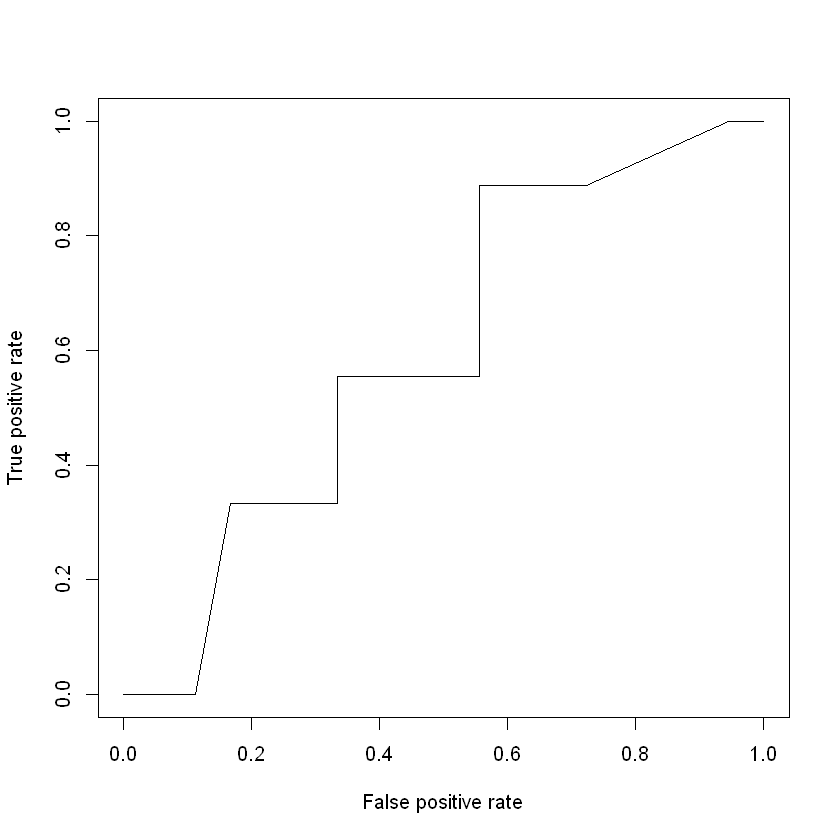

In [22]:
model <- glm(t2_1 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_2 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2127  -0.8735  -0.6244   1.1139   2.2983  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -0.02211    1.32053  -0.017    0.987
definitionharmony  0.21795    0.78786   0.277    0.782
needharmony        0.81305    0.73531   1.106    0.269
purposecosmetic    0.25622    0.74559   0.344    0.731
purposeetc        -0.57422    0.70418  -0.815    0.415
interest          -0.39416    0.31603  -1.247    0.212

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.382  on 62  degrees of freedom
Residual deviance: 69.534  on 57  degrees of freedom
AIC: 81.534

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,75.38197,NA
definition,1,1.8757249,61,73.50624,0.1708208
need,1,0.8910608,60,72.61518,0.3451900
purpose,2,1.4898827,58,71.12530,0.4747621
interest,1,1.5916529,57,69.53365,0.2070901


[1] 0.4565217

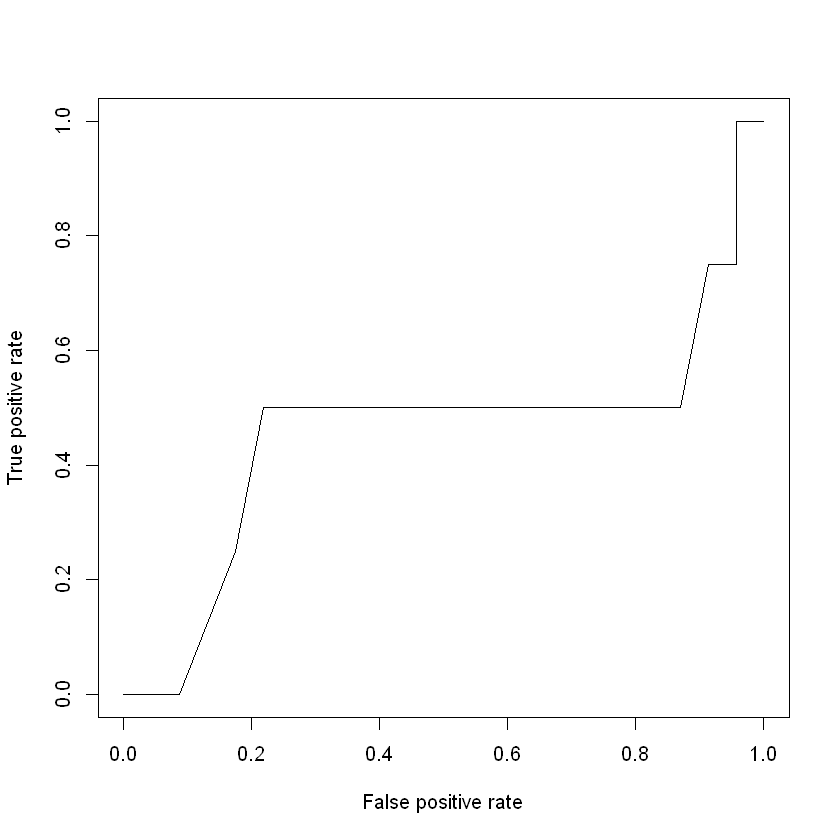

In [23]:
model <- glm(t2_2 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_3 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0886  -0.6914  -0.5592  -0.3489   2.3004  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -2.5300     1.6514  -1.532    0.126
definitionharmony  -1.0297     0.9182  -1.121    0.262
needharmony         0.9992     0.9270   1.078    0.281
purposecosmetic    -0.2707     1.0161  -0.266    0.790
purposeetc          0.1964     0.8125   0.242    0.809
interest            0.2637     0.3785   0.697    0.486

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 58.352  on 62  degrees of freedom
Residual deviance: 55.477  on 57  degrees of freedom
AIC: 67.477

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,58.35193,NA
definition,1,0.6322661,61,57.71967,0.4265253
need,1,1.4314234,60,56.28824,0.2315323
purpose,2,0.3120782,58,55.97617,0.8555257
interest,1,0.4992205,57,55.47694,0.4798428


[1] 0.5863636

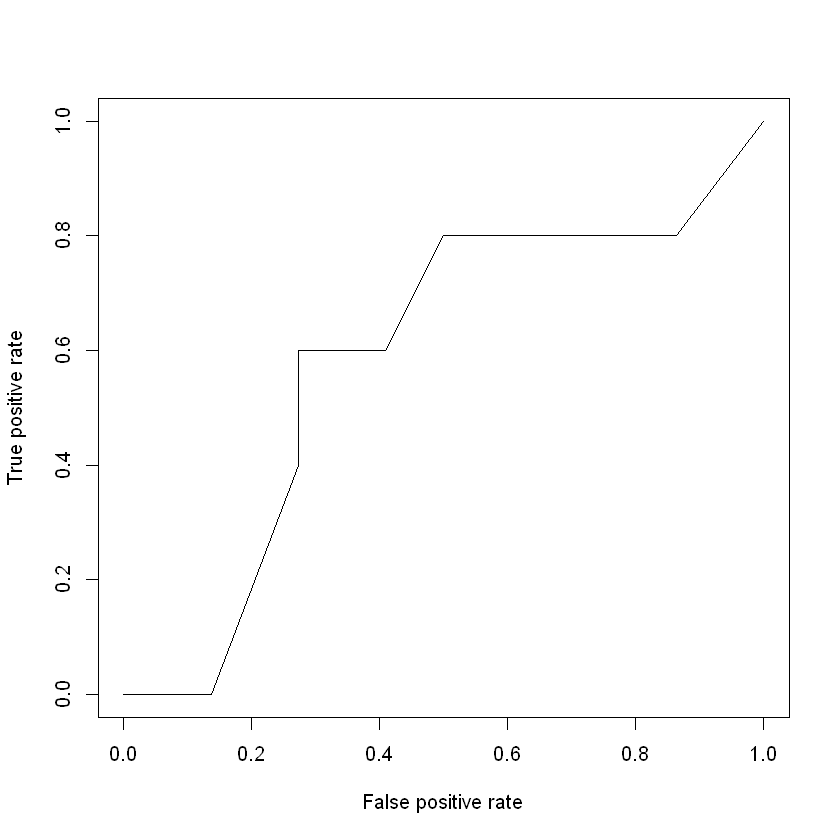

In [24]:
model <- glm(t2_3 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_4 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0024  -0.6112  -0.5577  -0.4971   2.0333  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -2.19409    1.63642  -1.341    0.180
definitionharmony  1.23691    0.95434   1.296    0.195
needharmony       -1.21712    0.83843  -1.452    0.147
purposecosmetic    0.06877    0.93376   0.074    0.941
purposeetc         0.28807    0.86535   0.333    0.739
interest           0.08079    0.37447   0.216    0.829

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 58.352  on 62  degrees of freedom
Residual deviance: 55.736  on 57  degrees of freedom
AIC: 67.736

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,58.35193,NA
definition,1,0.35407404,61,57.99786,0.5518159
need,1,2.07946538,60,55.91839,0.1492925
purpose,2,0.13595464,58,55.78244,0.9342817
interest,1,0.04682233,57,55.73562,0.8286879


[1] 0.2222222

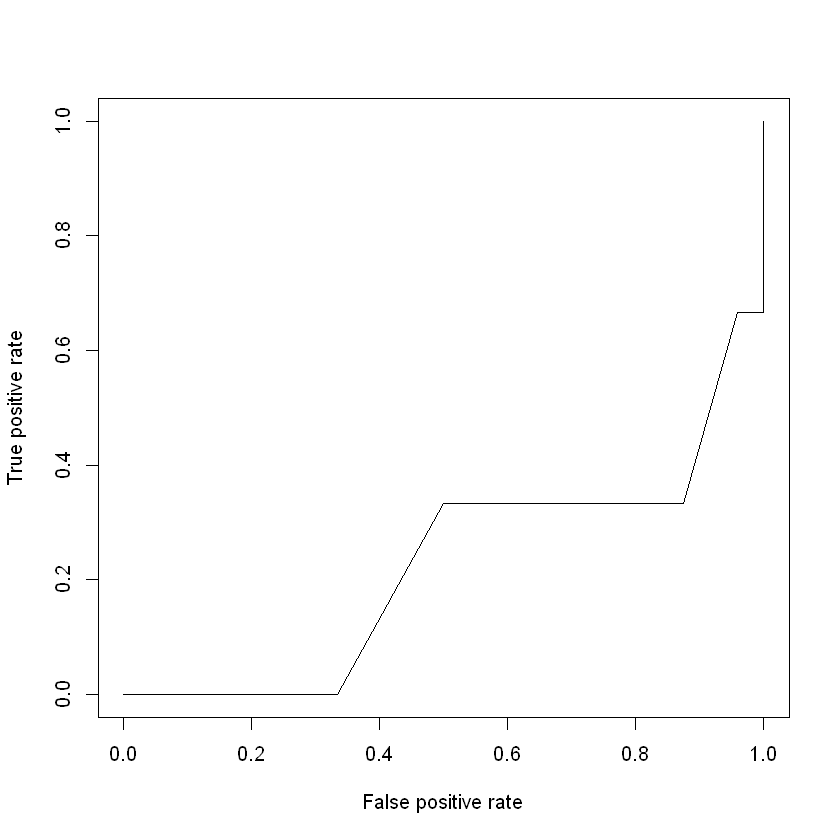

In [25]:
model <- glm(t2_4 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = t2_5 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9119  -0.5180  -0.3619  -0.2594   2.6435  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -5.77420    2.42966  -2.377   0.0175 *
definitionharmony -0.11460    1.16862  -0.098   0.9219  
needharmony        0.20316    1.14275   0.178   0.8589  
purposecosmetic    0.07433    1.48431   0.050   0.9601  
purposeetc         1.17172    1.16696   1.004   0.3153  
interest           0.77030    0.50943   1.512   0.1305  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.953  on 62  degrees of freedom
Residual deviance: 39.152  on 57  degrees of freedom
AIC: 51.152

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,43.95284,NA
definition,1,0.2127020,61,43.74014,0.6446578
need,1,0.1115388,60,43.62860,0.7383990
purpose,2,1.8732974,58,41.75531,0.3919391
interest,1,2.6032380,57,39.15207,0.1066456


[1] 0.6349206

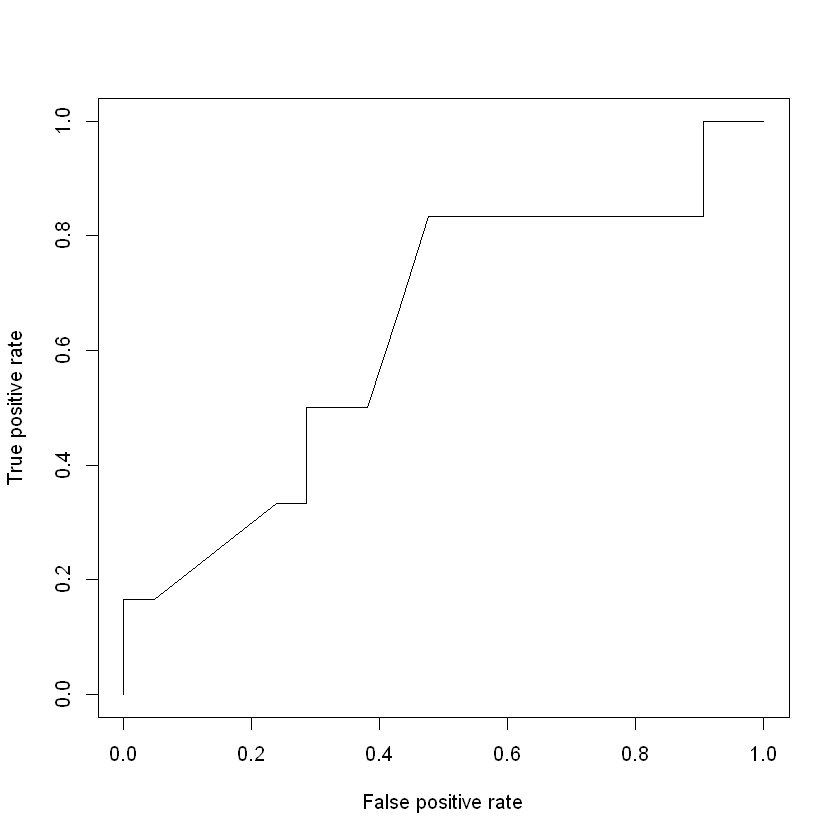

In [26]:
model <- glm(t2_5 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$t2_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d1_1 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8892  -0.7698  -0.7015  -0.5422   1.9498  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)
(Intercept)       -1.022e+00  1.380e+00  -0.740    0.459
definitionharmony  2.119e-01  7.973e-01   0.266    0.790
needharmony       -6.745e-01  7.532e-01  -0.896    0.370
purposecosmetic   -2.552e-01  8.645e-01  -0.295    0.768
purposeetc         2.975e-01  7.266e-01   0.409    0.682
interest           7.635e-05  3.222e-01   0.000    1.000

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 69.158  on 62  degrees of freedom
Residual deviance: 67.747  on 57  degrees of freedom
AIC: 79.747

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,69.15817,NA
definition,1,2.204879e-01,61,68.93768,0.6386684
need,1,6.616125e-01,60,68.27607,0.4159913
purpose,2,5.288819e-01,58,67.74719,0.7676350
interest,1,5.615459e-08,57,67.74719,0.9998109


[1] 0.5954545

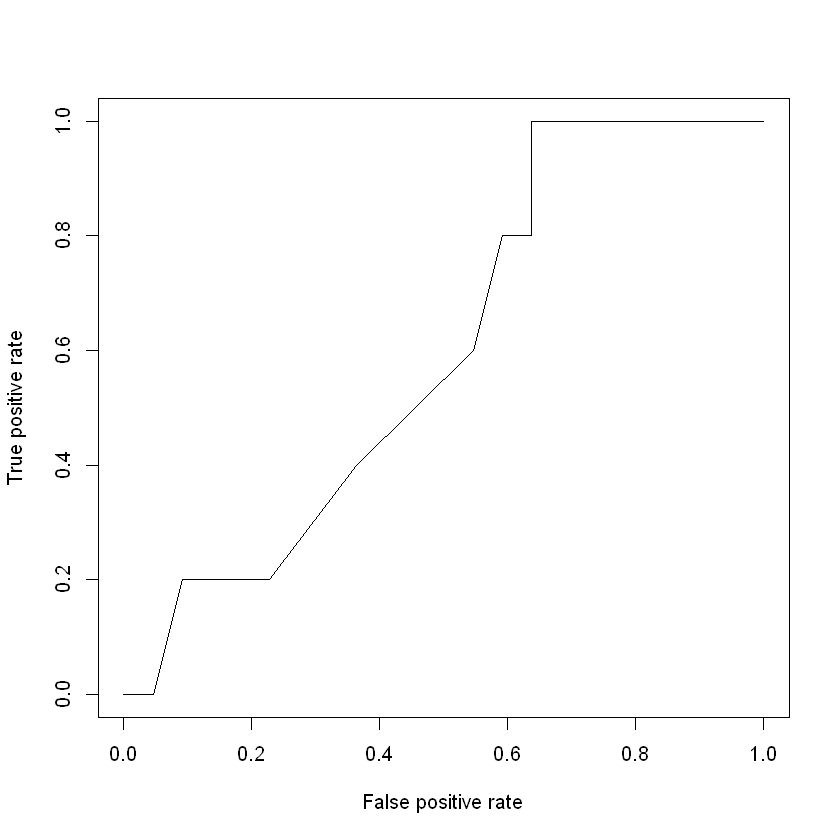

In [27]:
model <- glm(d1_1 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d1_2 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2495  -0.9254  -0.8081   1.2083   1.6588  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        0.57283    1.21408   0.472    0.637
definitionharmony -0.71890    0.69025  -1.042    0.298
needharmony       -0.08165    0.66027  -0.124    0.902
purposecosmetic   -0.32507    0.73705  -0.441    0.659
purposeetc        -0.00604    0.63143  -0.010    0.992
interest          -0.13297    0.28381  -0.469    0.639

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 83.731  on 62  degrees of freedom
Residual deviance: 81.231  on 57  degrees of freedom
AIC: 93.231

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,83.73058,NA
definition,1,2.01133372,61,81.71925,0.1561280
need,1,0.00913046,60,81.71012,0.9238752
purpose,2,0.25893123,58,81.45119,0.8785648
interest,1,0.22034747,57,81.23084,0.6387753


[1] 0.5493827

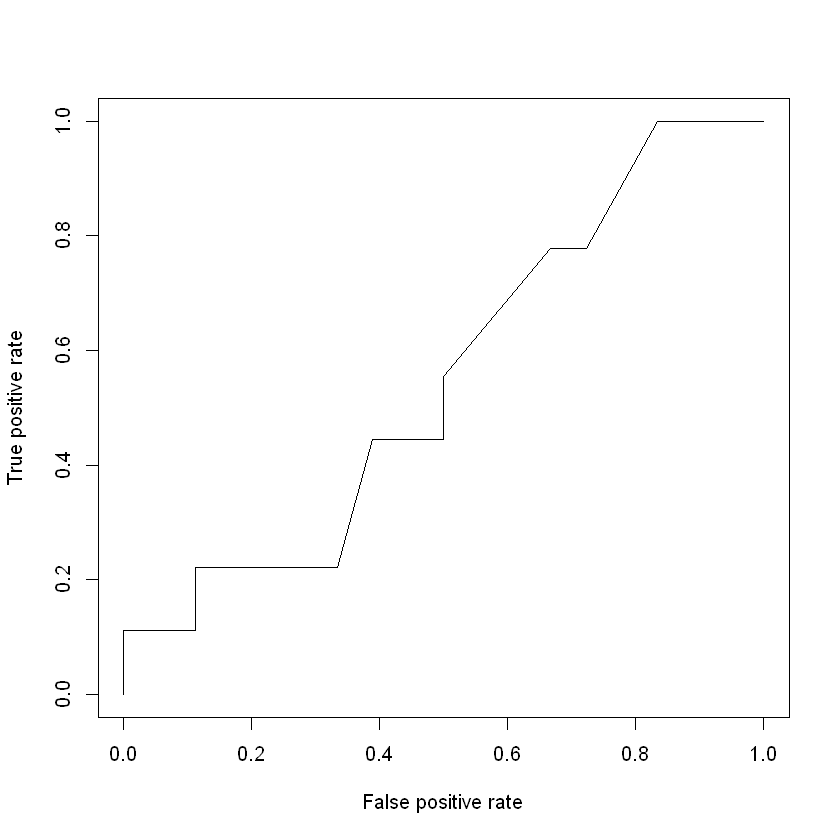

In [28]:
model <- glm(d1_2 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d1_3 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0614  -0.5084  -0.4068  -0.2847   2.2508  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -2.4677     1.8632  -1.324    0.185
definitionharmony  -0.2570     1.1158  -0.230    0.818
needharmony         1.1646     1.1029   1.056    0.291
purposecosmetic     1.8746     1.2031   1.558    0.119
purposeetc          0.7661     1.2093   0.633    0.526
interest           -0.2967     0.4067  -0.730    0.466

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 47.957  on 62  degrees of freedom
Residual deviance: 43.025  on 57  degrees of freedom
AIC: 55.025

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,47.95726,NA
definition,1,0.4158407,61,47.54142,0.5190198
need,1,0.8422020,60,46.69922,0.3587678
purpose,2,3.1452853,58,43.55393,0.2074961
interest,1,0.5290555,57,43.02488,0.4670042


[1] 0.6032609

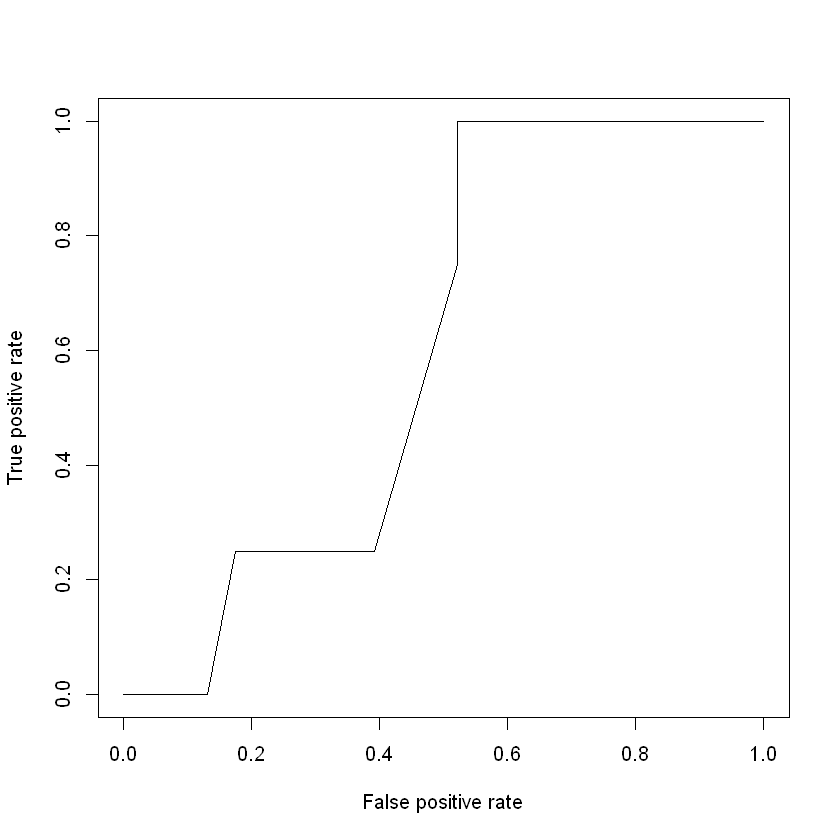

In [29]:
model <- glm(d1_3 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d1_5 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.00214  -0.59007  -0.40510  -0.00008   2.11817  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)         -3.1866     1.9917  -1.600    0.110
definitionharmony    0.3134     1.0906   0.287    0.774
needharmony          0.8064     1.0532   0.766    0.444
purposecosmetic    -18.3447  2622.4743  -0.007    0.994
purposeetc          -0.5840     0.8045  -0.726    0.468
interest             0.3279     0.4466   0.734    0.463

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 47.957  on 62  degrees of freedom
Residual deviance: 40.575  on 57  degrees of freedom
AIC: 52.575

Number of Fisher Scoring iterations: 18


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,47.95726,NA
definition,1,0.4158407,61,47.54142,0.51901980
need,1,0.8422020,60,46.69922,0.35876776
purpose,2,5.5778537,58,41.12136,0.06148716
interest,1,0.5461732,57,40.57519,0.45988554


[1] 0.4615385

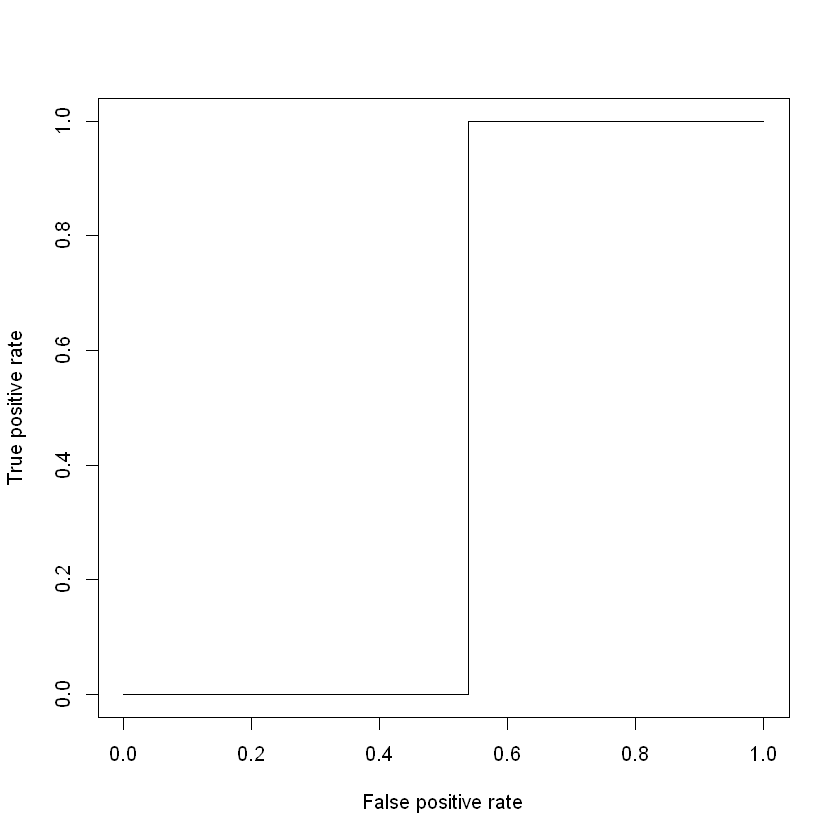

In [30]:
model <- glm(d1_5 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d1_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_1 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1286  -1.0015  -0.8572   1.3153   1.7632  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -1.1056     1.2369  -0.894    0.371
definitionharmony   0.5051     0.7056   0.716    0.474
needharmony        -0.4638     0.6564  -0.707    0.480
purposecosmetic    -0.3929     0.7351  -0.534    0.593
purposeetc          0.1420     0.6289   0.226    0.821
interest            0.1613     0.2874   0.561    0.575

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 83.731  on 62  degrees of freedom
Residual deviance: 82.358  on 57  degrees of freedom
AIC: 94.358

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,83.73058,NA
definition,1,0.0431061,61,83.68748,0.8355256
need,1,0.3652605,60,83.32222,0.5455991
purpose,2,0.6447970,58,82.67742,0.7244094
interest,1,0.3192023,57,82.35822,0.5720875


[1] 0.45

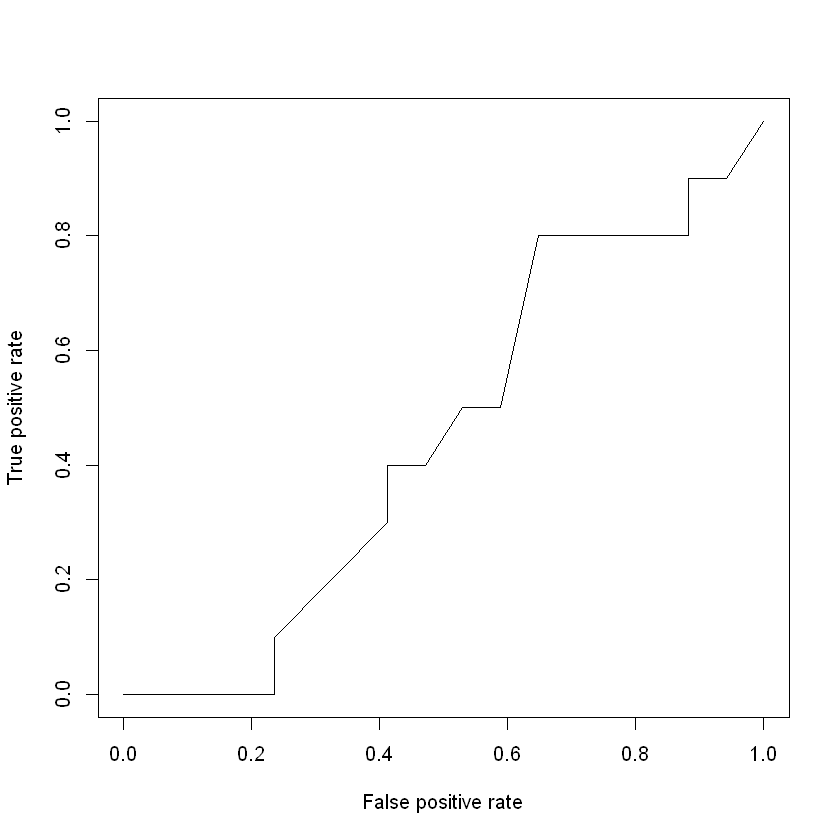

In [31]:
model <- glm(d2_1 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_2 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1151  -0.7688  -0.5866  -0.3551   2.2082  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        1.43436    1.38293   1.037    0.300
definitionharmony -0.35538    0.82075  -0.433    0.665
needharmony       -0.09464    0.78696  -0.120    0.904
purposecosmetic   -1.31535    0.93751  -1.403    0.161
purposeetc        -0.46927    0.68745  -0.683    0.495
interest          -0.52758    0.33645  -1.568    0.117

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 69.158  on 62  degrees of freedom
Residual deviance: 64.247  on 57  degrees of freedom
AIC: 76.247

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,69.15817,NA
definition,1,0.220487941,61,68.93768,0.6386684
need,1,0.007160973,60,68.93052,0.9325615
purpose,2,2.129922872,58,66.80060,0.3447411
interest,1,2.553765093,57,64.24684,0.1100318


[1] 0.75

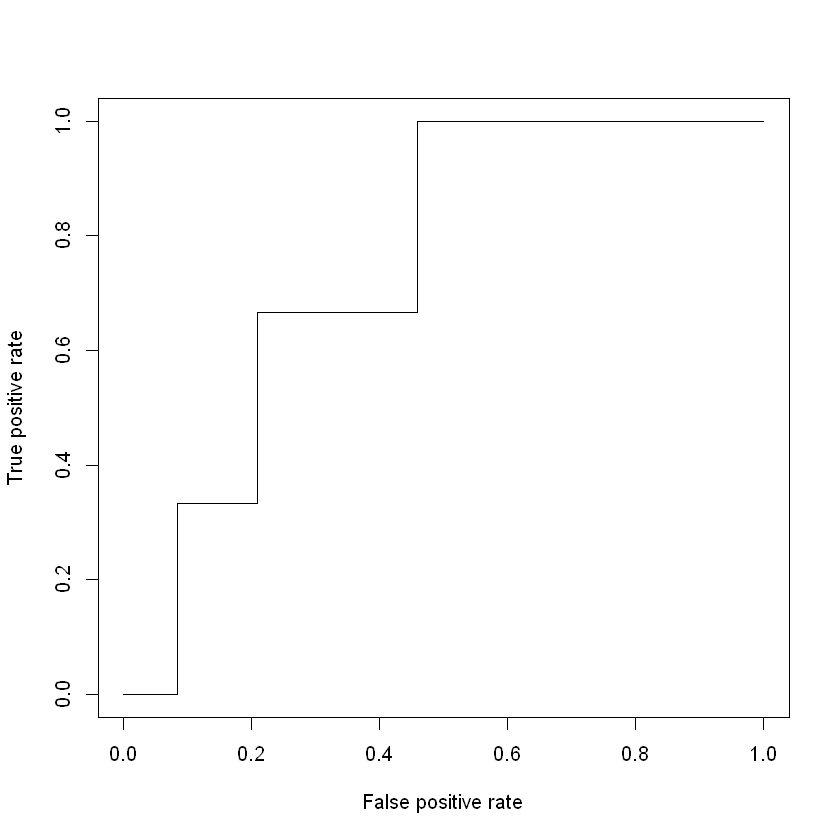

In [32]:
model <- glm(d2_2 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_3 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0427  -0.4602  -0.3040  -0.1599   2.5841  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -5.9173     2.6373  -2.244   0.0249 *
definitionharmony  -1.0090     1.2662  -0.797   0.4255  
needharmony         2.3095     1.5024   1.537   0.1242  
purposecosmetic     0.2798     1.5326   0.183   0.8551  
purposeetc          1.2137     1.2645   0.960   0.3371  
interest            0.5172     0.5275   0.980   0.3269  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 39.626  on 62  degrees of freedom
Residual deviance: 34.207  on 57  degrees of freedom
AIC: 46.207

Number of Fisher Scoring iterations: 6


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,39.62602,NA
definition,1,0.007400033,61,39.61862,0.93144778
need,1,2.921488934,60,36.69713,0.08740718
purpose,2,1.464027707,58,35.23310,0.48093947
interest,1,1.026585825,57,34.20651,0.31096191


[1] 0.7065217

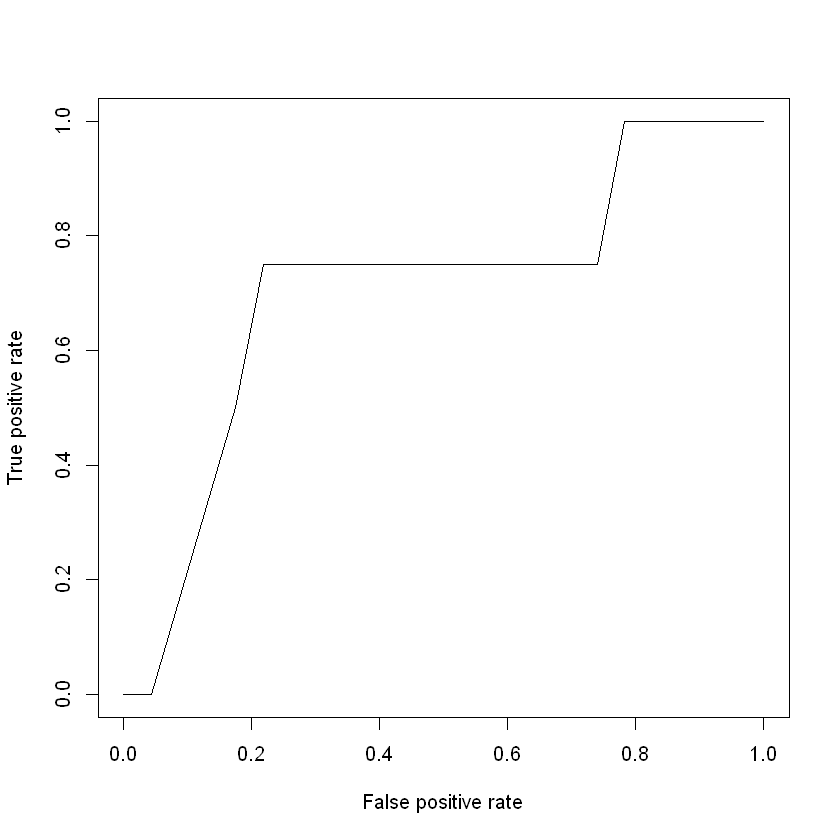

In [33]:
model <- glm(d2_3 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_4 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0549  -0.6127  -0.5275  -0.4284   2.1965  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -1.0984     1.5328  -0.717   0.4736  
definitionharmony   0.1839     0.8848   0.208   0.8353  
needharmony        -0.4648     0.8162  -0.569   0.5691  
purposecosmetic     1.5778     0.9183   1.718   0.0858 .
purposeetc          0.2953     0.9441   0.313   0.7544  
interest           -0.2469     0.3556  -0.694   0.4876  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 61.351  on 62  degrees of freedom
Residual deviance: 56.166  on 57  degrees of freedom
AIC: 68.166

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,61.35100,NA
definition,1,0.01652587,61,61.33448,0.8977114
need,1,0.58275154,60,60.75172,0.4452358
purpose,2,4.09812956,58,56.65359,0.1288554
interest,1,0.48781445,57,56.16578,0.4849038


[1] 0.3321429

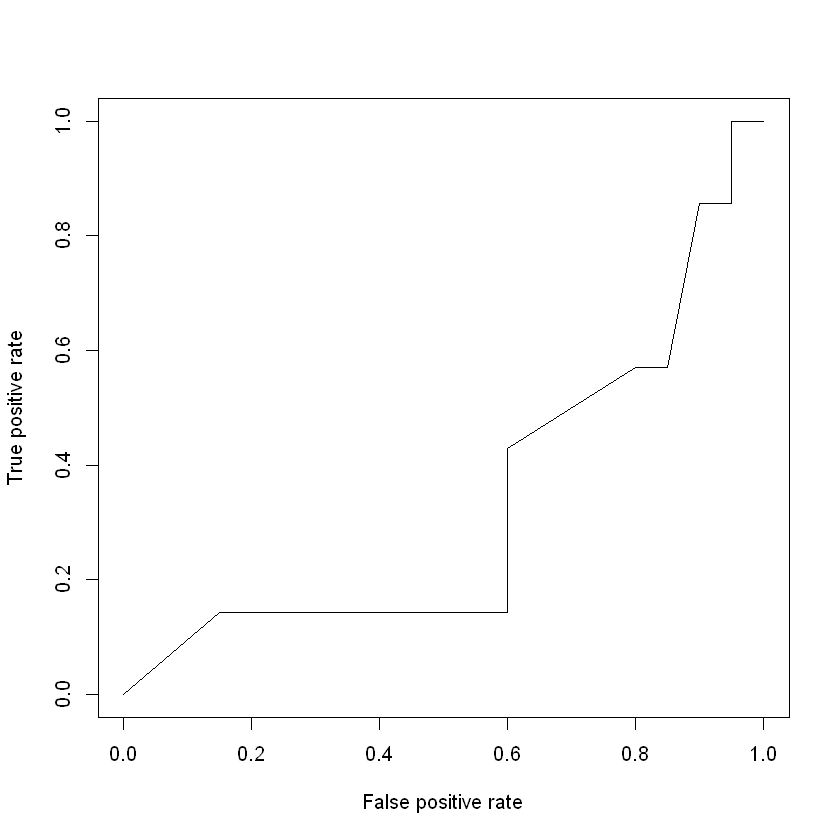

In [34]:
model <- glm(d2_4 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d2_5 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8049  -0.4659  -0.4211  -0.3152   2.4604  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)        -4.5048     2.3485  -1.918   0.0551 .
definitionharmony  -0.1854     1.0768  -0.172   0.8633  
needharmony         0.5504     1.0414   0.529   0.5971  
purposecosmetic     0.1078     1.0932   0.099   0.9215  
purposeetc         -0.6333     1.0755  -0.589   0.5560  
interest            0.5987     0.5236   1.143   0.2529  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 39.626  on 62  degrees of freedom
Residual deviance: 37.382  on 57  degrees of freedom
AIC: 49.382

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,39.62602,NA
definition,1,0.007400033,61,39.61862,0.9314478
need,1,0.307921055,60,39.31070,0.5789587
purpose,2,0.498366801,58,38.81233,0.7794370
interest,1,1.429935696,57,37.38239,0.2317749


[1] 0.5694444

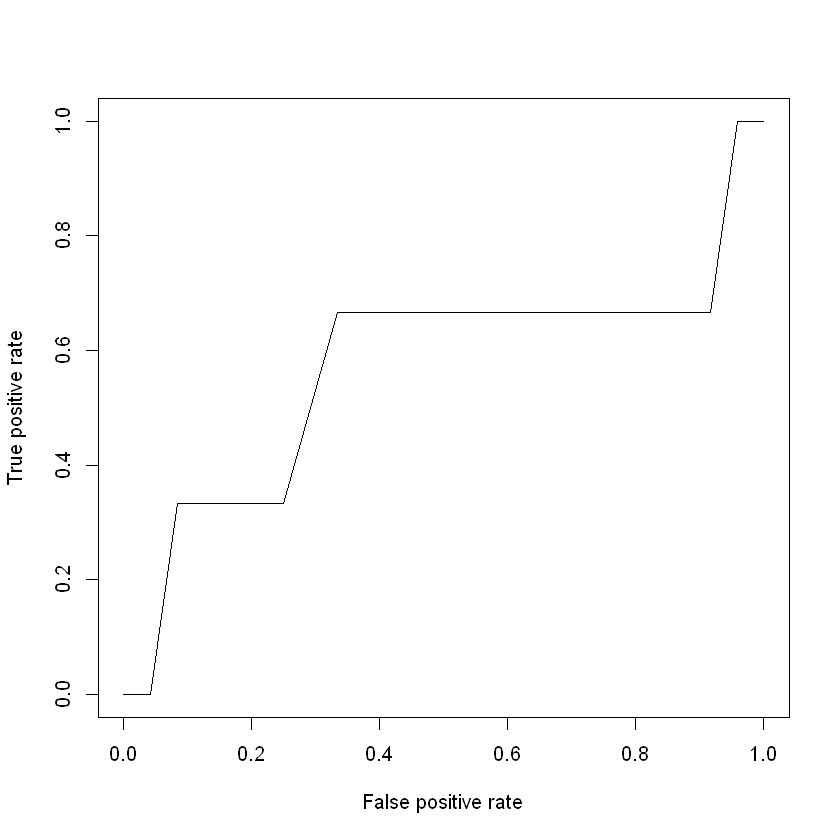

In [35]:
model <- glm(d2_5 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d2_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_1 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1989  -0.6704  -0.4657  -0.2982   2.1357  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)       -2.77139    1.56079  -1.776   0.0758 .
definitionharmony -0.68973    0.80290  -0.859   0.3903  
needharmony       -0.09834    0.75677  -0.130   0.8966  
purposecosmetic    1.43525    0.84063   1.707   0.0878 .
purposeetc        -0.45606    0.86702  -0.526   0.5989  
interest           0.46222    0.36276   1.274   0.2026  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 66.743  on 62  degrees of freedom
Residual deviance: 58.461  on 57  degrees of freedom
AIC: 70.461

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,66.74298,NA
definition,1,0.4887201,61,66.25426,0.48449878
need,1,0.0635712,60,66.19069,0.80093803
purpose,2,6.0104552,58,60.18023,0.04952748
interest,1,1.7191111,57,58.46112,0.18980751


[1] 0.5277778

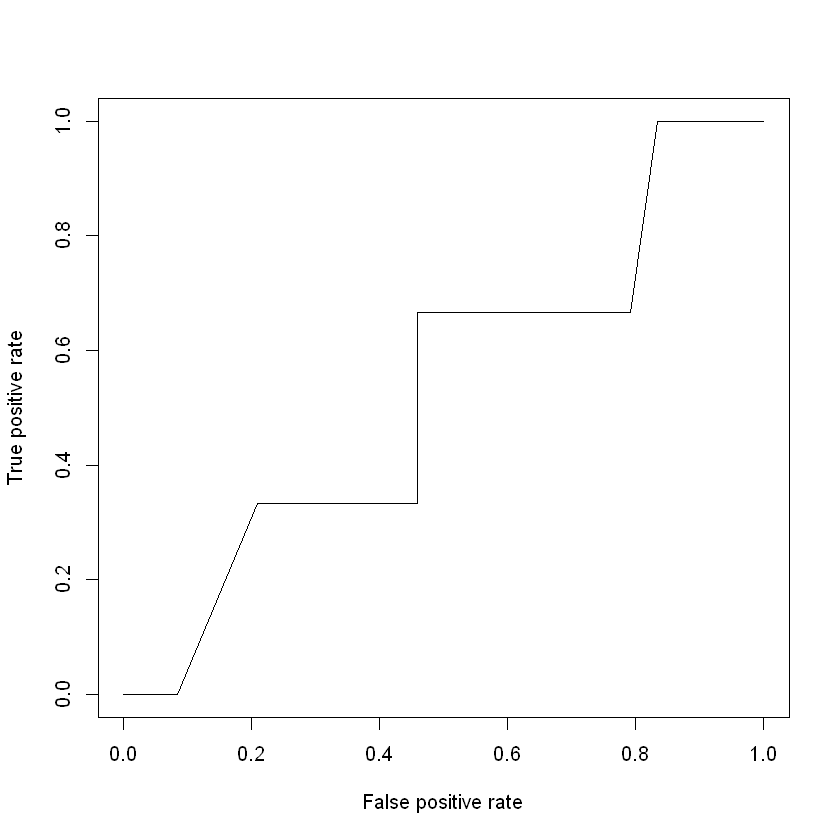

In [36]:
model <- glm(d3_1 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_1)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_2 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9630  -0.7621  -0.6862  -0.2968   2.3203  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)       -0.60046    1.48323  -0.405    0.686
definitionharmony -0.43003    0.87258  -0.493    0.622
needharmony        0.46696    0.84649   0.552    0.581
purposecosmetic   -1.72553    1.16262  -1.484    0.138
purposeetc        -0.20993    0.69289  -0.303    0.762
interest          -0.09859    0.35173  -0.280    0.779

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 64.144  on 62  degrees of freedom
Residual deviance: 60.409  on 57  degrees of freedom
AIC: 72.409

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,64.14399,NA
definition,1,0.08941082,61,64.05458,0.7649275
need,1,0.43710005,60,63.61748,0.5085255
purpose,2,3.13018067,58,60.48730,0.2090691
interest,1,0.07846807,57,60.40883,0.7793843


[1] 0.7152778

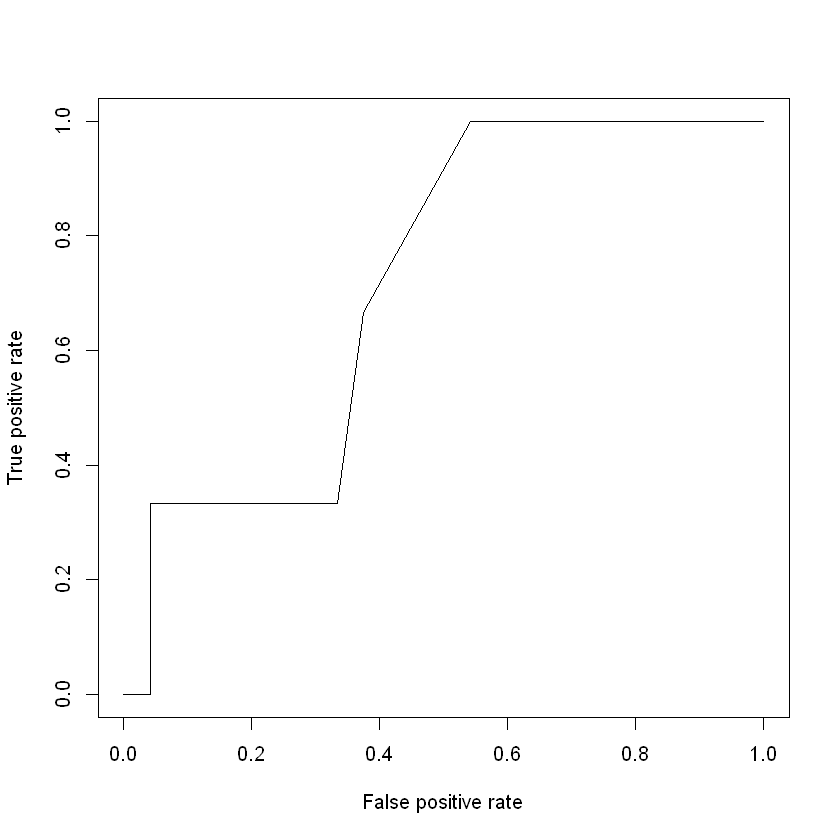

In [37]:
model <- glm(d3_2 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_2)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_3 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0698  -0.6563  -0.3725  -0.2522   2.6321  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)        -6.2103     2.3278  -2.668  0.00763 **
definitionharmony   0.8124     1.1066   0.734  0.46287   
needharmony        -0.4509     1.0052  -0.449  0.65375   
purposecosmetic     0.7904     1.3057   0.605  0.54495   
purposeetc          1.5625     1.1881   1.315  0.18847   
interest            0.8055     0.4657   1.730  0.08368 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 51.675  on 62  degrees of freedom
Residual deviance: 45.614  on 57  degrees of freedom
AIC: 57.614

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,51.67466,NA
definition,1,0.01171156,61,51.66294,0.91382120
need,1,0.04098273,60,51.62196,0.83957127
purpose,2,2.55203078,58,49.06993,0.27914738
interest,1,3.45546126,57,45.61447,0.06304314


[1] 0.4852941

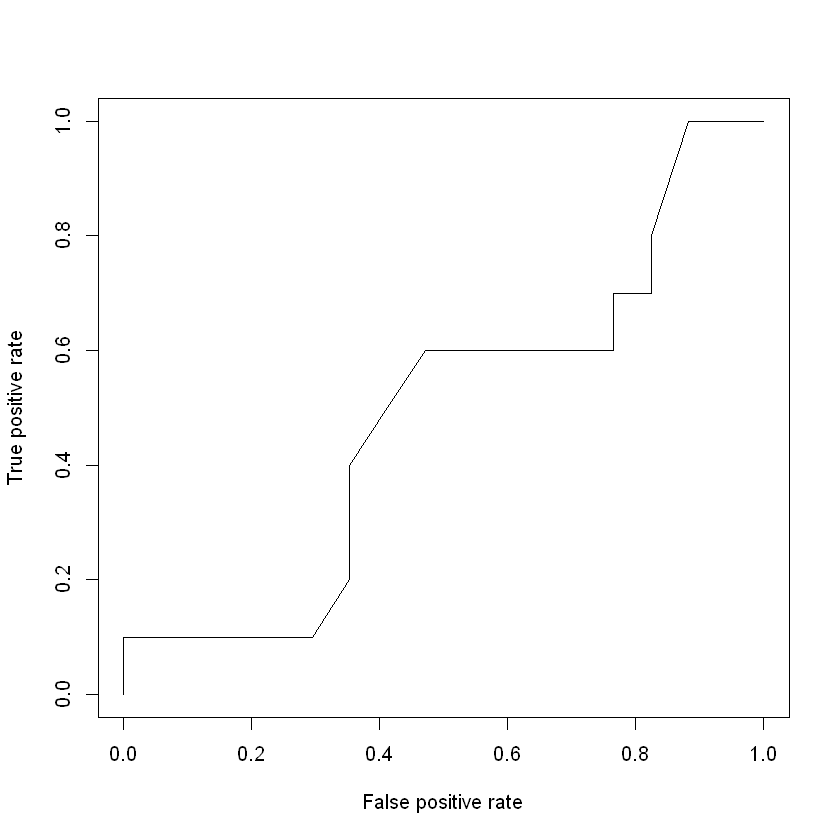

In [38]:
model <- glm(d3_3 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_4 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7844  -0.6310  -0.4839  -0.3399   2.3270  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        -0.4434     1.6578  -0.267    0.789
definitionharmony   0.3244     1.0368   0.313    0.754
needharmony        -0.3292     0.9682  -0.340    0.734
purposecosmetic    -1.1256     1.2207  -0.922    0.356
purposeetc          0.1320     0.8283   0.159    0.873
interest           -0.3549     0.4004  -0.886    0.375

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 51.675  on 62  degrees of freedom
Residual deviance: 49.391  on 57  degrees of freedom
AIC: 61.391

Number of Fisher Scoring iterations: 5


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,51.67466,NA
definition,1,0.01171156,61,51.66294,0.9138212
need,1,0.04098273,60,51.62196,0.8395713
purpose,2,1.43859205,58,50.18337,0.4870950
interest,1,0.79228601,57,49.39108,0.3734098


[1] 0.2896825

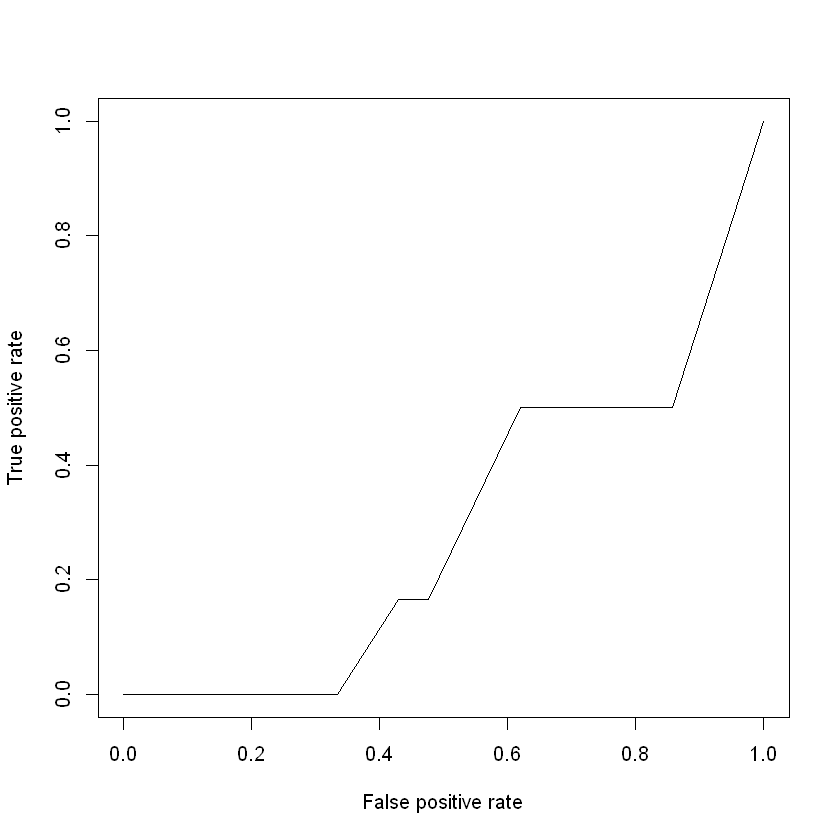

In [39]:
model <- glm(d3_4 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_4)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc


Call:
glm(formula = d3_5 ~ definition + need + purpose + interest, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2509  -0.8293  -0.6756   1.2896   2.0832  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)
(Intercept)        0.73135    1.29492   0.565    0.572
definitionharmony  0.30414    0.77523   0.392    0.695
needharmony        0.02908    0.71432   0.041    0.968
purposecosmetic   -0.07518    0.75383  -0.100    0.921
purposeetc        -0.35431    0.68533  -0.517    0.605
interest          -0.48515    0.31354  -1.547    0.122

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.382  on 62  degrees of freedom
Residual deviance: 71.936  on 57  degrees of freedom
AIC: 83.936

Number of Fisher Scoring iterations: 4


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,62,75.38197,NA
definition,1,0.578959430,61,74.80301,0.4467205
need,1,0.001465467,60,74.80154,0.9694633
purpose,2,0.368194079,58,74.43335,0.8318551
interest,1,2.497602303,57,71.93575,0.1140198


[1] 0.4409091

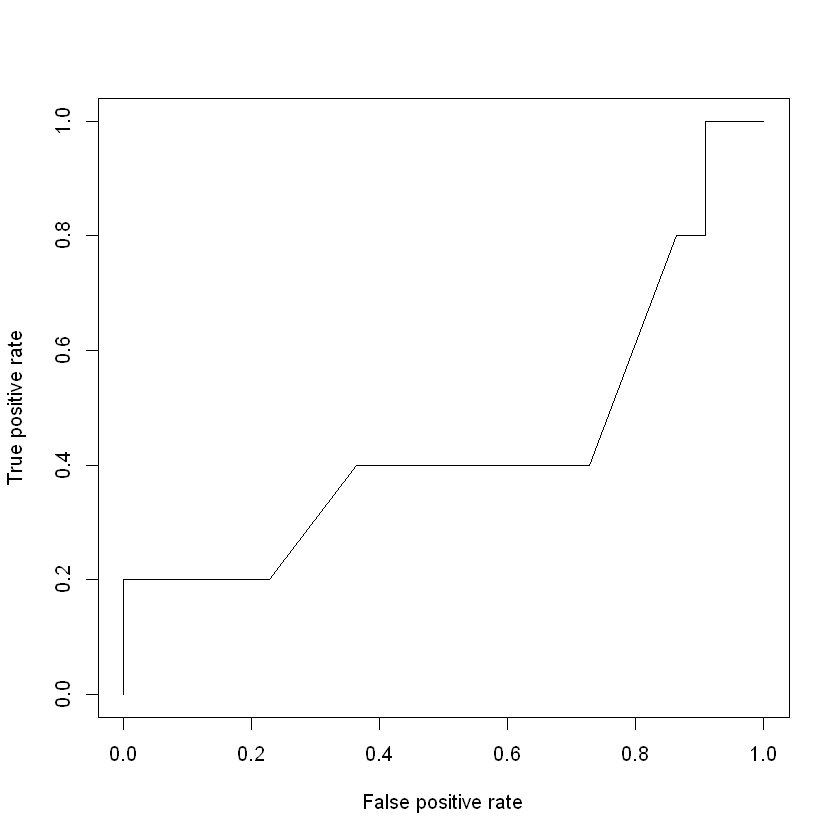

In [40]:
model <- glm(d3_5 ~ definition + need + purpose 
              + interest, data =train, family = binomial)
summary(model)


anova(model, test="Chisq")


p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$d3_5)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc